This folder is an example of how to use the funtions to generate data in the utils file 

In [1]:
from PIL import Image
import numpy as np
from data import data_transforms
from utils import *
import matplotlib.pyplot as plt
import os
import torch
import torchvision.transforms.functional as F
import os

We select a number in the image folder, then show the corresponding image and mask

In [4]:
List_files = os.listdir('Images/')

In [6]:
num = 150

In [10]:
image_name = List_files[150][:-4]

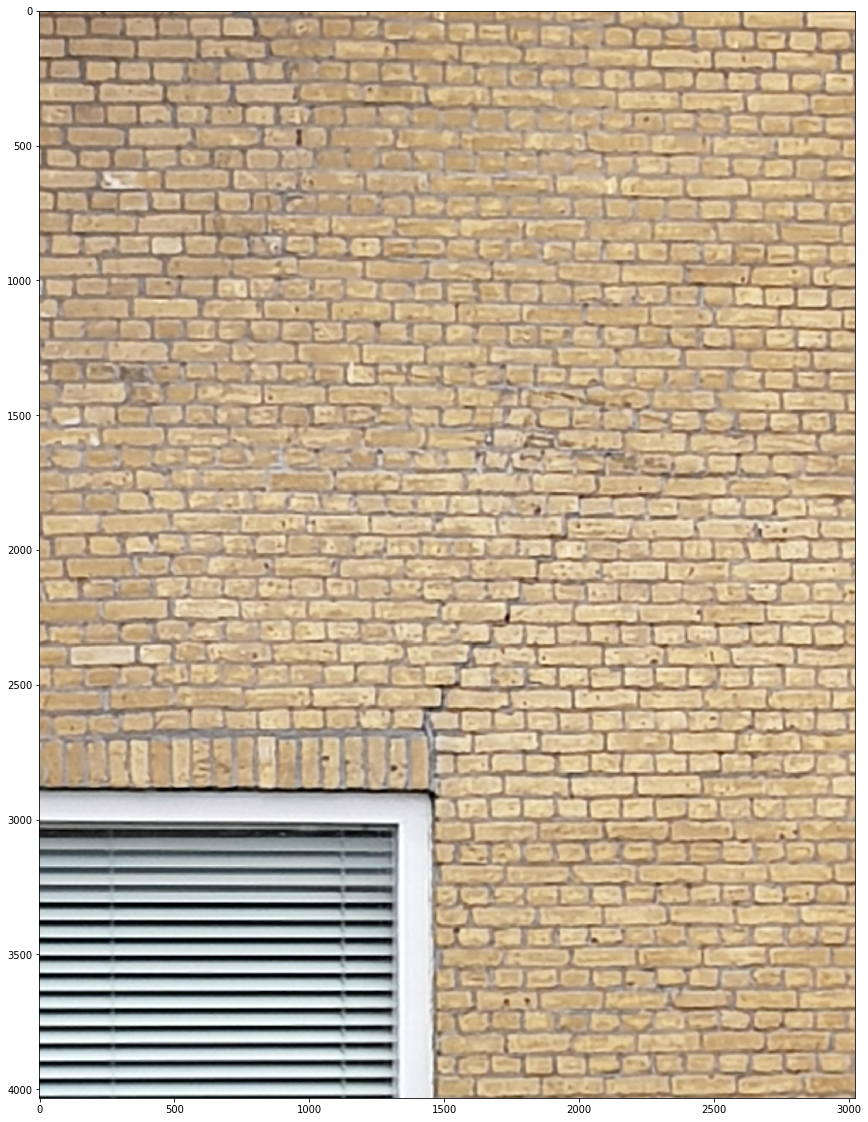

In [15]:
image = Image.open('Images/' + image_name + '.jpg')
fig = plt.figure(figsize=(20,20))
plt.imshow(image)

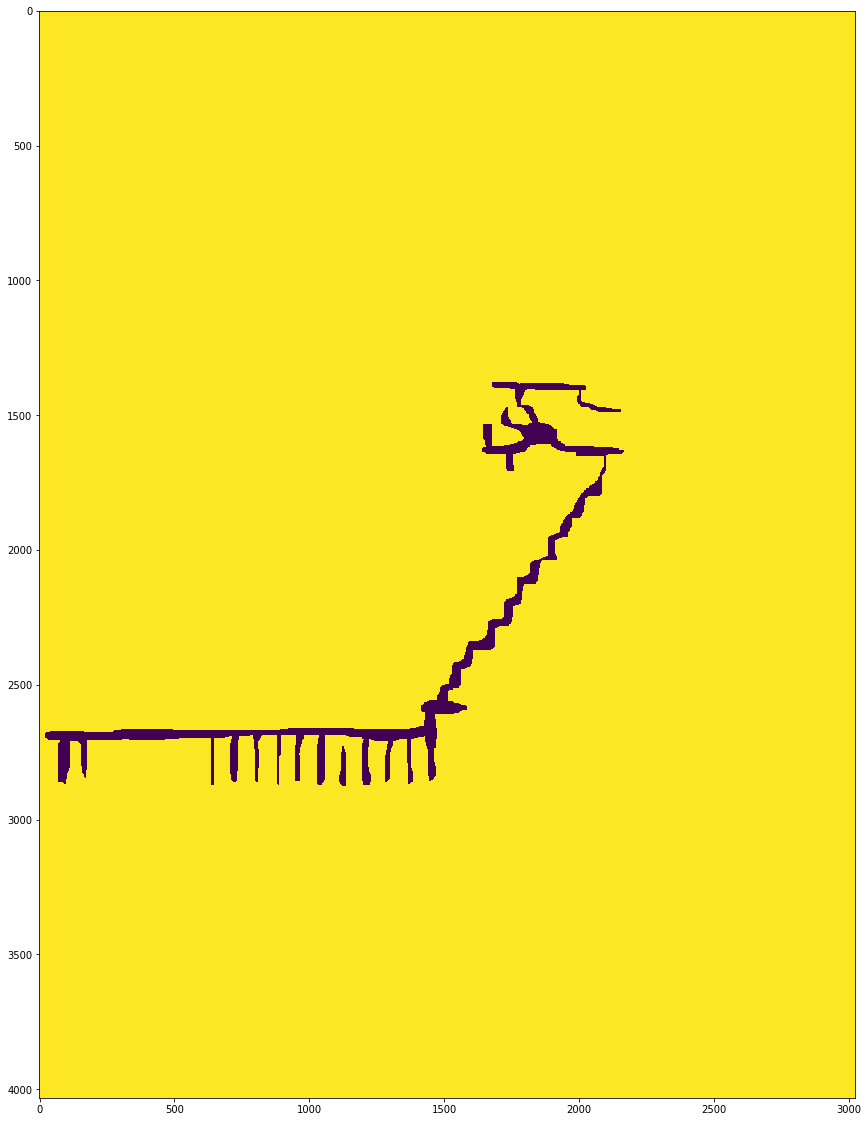

In [11]:
mask = Image.open('Masks/' + image_name + '_mask.tif')
fig = plt.figure(figsize=(20,20))
plt.imshow(mask)

Then we convert the mask to array, and generate data with the chosen parameters

In [16]:
matrix = np.array(mask)

In [17]:
size_of_crops = 750
distance_from_centroid = 15
authorized_overlap = 0.3

In [18]:
pos , neg = generate_data_from_one_image(image , matrix , size_of_crops , distance_from_centroid , authorized_overlap)

generating....
(4032, 3024)
(3024, 4032)
Negative data : 10
Negative data : 20
Negative data : 30
Negative data : 40
Negative data : 50
Negative data : 60
Negative data : 70
Negative data : 80
Negative data : 90
Negative data : 100
Negative data : 110
Negative data : 120
6
124
done


Then we check if the crops generated are relevant, in the right folder, in order to be sure to create a clean dataset, and to handle potential errors in masks :

IndexError: list index out of range

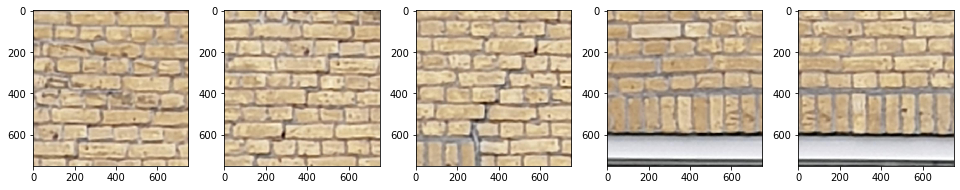

In [19]:
fig=plt.figure(figsize=(20, 20))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    img = pos[i][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

IndexError: list index out of range

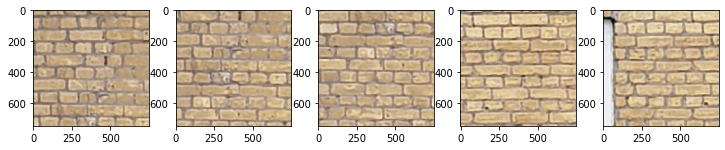

In [21]:
fig=plt.figure(figsize=(20, 20))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = neg[i][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In the end, we remove additionnal negative crops due to the higher proportion of crack pixels in masks, in order to create a balanced dataset :

In [20]:
p = len(pos)
n = len(neg)
a = n - p
if n > p:
    indexes_to_remove = random.sample(range(0 , n) , a)
    indexes_to_remove.sort(reverse = True)
    for index in indexes_to_remove:
        neg.remove(neg[index])

Then we store the crops according to their label.

In [999]:
count_pos = 0
for crop in pos:
    crop[0].save('/home/eve/crack_detection/multi_size_images/positive/' + image_name + '_' + str(count_pos) +  '.jpg' , 'JPEG')
    count_pos += 1

In [1000]:
count_neg = 0
for crop in neg:
    crop[0].save('/home/eve/crack_detection/multi_size_images/negative/' + image_name + '_' + str(count_neg) +  '.jpg' , 'JPEG')
    count_neg += 1